In [1]:
import os
os.__file__

'C:\\Users\\hyha1\\anaconda3\\lib\\os.py'

In [2]:
# !pip install git+http://github.com/haven-jeon/PyKoSpacing.git

In [3]:
import csv
from collections import Counter
import pandas as pd
import re
from konlpy.tag import Okt
# from pykospacing import Spacing

In [4]:
# 1. 리뷰에서 영어표현, puncation, 이모티콘은 모두 제거한다. (=한글 표현만 남긴다)
# 2. 띄어쓰기 변환기를 통해 띄어쓰기가 되어있지 않은 문장들을 제대로 변환한다.
# 3. 형태소 분석기를 통해 각각의 리뷰를 형태소 단위로 분리한다.
# 4. 한글자로 되어있는 것 제거
# 5. 빈도수가 많은 순으로 정렬 후 의미없는 단어(불용어) 제거
# 6. 최소빈도수 이하의 것들은 제거한다.
# 7. 잘못 분리 된 의미있는 단어들을 찾아서 사용자 단어 사전에 추가

In [5]:
#영어나 이모티콘 등 필요없는 문자 빼기 extract 를 사용하기 
def extract_word(text):
    hangul = re.compile('[^가-힣]')
    result = hangul.sub(' ', text)
    return result

df = pd.read_csv('youtube_공조2_예고편.csv')
df['comment'] = df['comment'].apply(lambda x:extract_word(x))

In [6]:
# #띄어쓰기 (정리하기)

# spacing = Spacing()
# df['comment'] = df['comment'].apply(lambda x:spacing(x))

In [7]:
#형태소 분석

okt = Okt()
words = " ".join(df['comment'].tolist())
words = okt.morphs(words, stem=True)

In [8]:
# print(len(words))
# print(words)
print(len(words))

1815


In [9]:
# 갯수 확인
frequent = Counter(words).most_common()
frequent

[('공조', 49),
 ('보다', 40),
 ('하다', 33),
 ('이', 29),
 ('가', 27),
 ('영화', 23),
 ('재밌다', 20),
 ('의', 20),
 ('를', 18),
 ('에', 18),
 ('도', 16),
 ('현빈', 15),
 ('을', 15),
 ('는', 15),
 ('은', 14),
 ('오다', 14),
 ('너무', 13),
 ('북괴', 13),
 ('으로', 11),
 ('진짜', 11),
 ('윤아', 11),
 ('되다', 11),
 ('인터', 11),
 ('내다', 11),
 ('날', 11),
 ('에서', 10),
 ('기대', 10),
 ('네', 10),
 ('나오다', 10),
 ('같다', 9),
 ('들', 9),
 ('이다', 9),
 ('더', 8),
 ('한국', 8),
 ('없다', 8),
 ('로', 8),
 ('만', 8),
 ('아', 8),
 ('액션', 8),
 ('군', 7),
 ('유해진', 7),
 ('함', 7),
 ('있다', 7),
 ('다', 7),
 ('기', 7),
 ('잘', 6),
 ('내', 6),
 ('그렇다', 6),
 ('범죄', 6),
 ('개', 6),
 ('벌써', 6),
 ('연기', 6),
 ('니', 6),
 ('좋다', 6),
 ('개봉', 6),
 ('일', 6),
 ('까지', 6),
 ('때', 5),
 ('웃기다', 5),
 ('그리고', 5),
 ('과', 5),
 ('하고', 5),
 ('보고', 5),
 ('조선', 5),
 ('소년단', 5),
 ('다니엘', 5),
 ('헤', 5),
 ('케미', 5),
 ('한', 5),
 ('진선규', 5),
 ('가다', 5),
 ('예고편', 5),
 ('서', 5),
 ('편', 5),
 ('브금', 5),
 ('넘다', 5),
 ('완전', 5),
 ('크다', 4),
 ('만들다', 4),
 ('철령', 4),
 ('꼭', 4),
 ('악역', 4),
 ('항상', 

In [10]:
# 명사 단어 지정
# coustom_noun =["현빈", "유해진", "윤아", "다니엘헤니", "다니엘 헤니", "진선규", "장명준", "림철령", "강진태", "박민영", "잭"]

In [11]:
# 한글자로 된 단어만 따로 만들기
one_word = [x for x in words if len(x) == 1]
print(one_word, end= '')

['장', '명', '준', '가', '를', '더', '잘', '내', '엇', '도', '임', '독', '때', '도', '꼭', '저', '이', '군', '은', '은', '얼', '가', '컬', '이', '을', '함', '군', '의', '측', '는', '나', '군', '를', '함', '와', '의', '가', '과', '의', '가', '과', '의', '비', '가', '화', '는', '군', '의', '임', '는', '왜', '군', '을', '더', '를', '못', '이', '을', '의', '를', '가', '를', '적', '공', '조', '임', '가', '냐', '고', '을', '들', '을', '를', '군', '은', '은', '을', '내', '를', '는', '를', '를', '함', '로', '의', '는', '의', '는', '다', '뭐', '식', '의', '영', '개', '를', '함', '은', '을', '는', '도', '말', '는', '이', '을', '줌', '는', '손', '을', '함', '들', '이', '를', '군', '가', '이', '게', '안', '림', '씨', '의', '에', '저', '뿐', '만', '랑', '도', '벨', '빅', '잘', '개', '네', '헤', '니', '개', '더', '도', '도', '한', '꼭', '또', '은', '내', '발', '에', '이', '요', '내', '길', '에', '빛', '만', '왕', '의', '왕', '곧', '가', '를', '한', '들', '에', '헤', '니', '생', '봄', '슴', '들', '다', '함', '로', '과', '헤', '니', '씨', '가', '감', '제', '눈', '이', '죠', '돈', '억', '불', '겨', '들', '만', '개', '이', '돈', '자', '급', '대', '날', '대', '일', '에', '날', '를', '로', '날', '가',

In [12]:
# 한글자로 된 단어들 메모장에 저장
with open('one_word.txt', 'w') as f:
    for line in one_word:
        f.write(line + ',')
    f.close()

In [13]:
# stopwords.txt 파일 이용하여 불용어 제거 
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in words if x not in stopwords]
len(remove_stopwords)

1214

In [14]:
# 불용어 제거 후 객체 빈도수 확인
# 갯수 확인
Counter(remove_stopwords).most_common()
len(remove_stopwords)

1214

In [15]:
# 한글자로 된 단어 메모장에 저장한 것 사용해서 제거
with open('one_word.txt', 'r') as f:
    list_file = f.readlines()
one_word = list_file[0].split(",")
one_remove_stopwords = [x for x in remove_stopwords if x not in one_word]
len(one_remove_stopwords)

876

In [16]:
frequent_2 = Counter(one_remove_stopwords).most_common()
frequent_2

[('공조', 49),
 ('재밌다', 20),
 ('현빈', 15),
 ('북괴', 13),
 ('윤아', 11),
 ('인터', 11),
 ('기대', 10),
 ('한국', 8),
 ('액션', 8),
 ('유해진', 7),
 ('범죄', 6),
 ('벌써', 6),
 ('연기', 6),
 ('좋다', 6),
 ('개봉', 6),
 ('웃기다', 5),
 ('조선', 5),
 ('소년단', 5),
 ('다니엘', 5),
 ('케미', 5),
 ('진선규', 5),
 ('예고편', 5),
 ('브금', 5),
 ('크다', 4),
 ('만들다', 4),
 ('철령', 4),
 ('악역', 4),
 ('항상', 4),
 ('멋있다', 4),
 ('문제', 4),
 ('배우', 4),
 ('영화관', 4),
 ('도시', 4),
 ('위성락', 4),
 ('다니엘헤니', 4),
 ('북한', 4),
 ('천만', 4),
 ('지리다', 3),
 ('대한민국', 3),
 ('에서도', 3),
 ('묘사', 3),
 ('멋지다', 3),
 ('현실', 3),
 ('일으키다', 3),
 ('아무', 3),
 ('미치다', 3),
 ('기대다', 3),
 ('보여주다', 3),
 ('잘생기다', 3),
 ('파리채', 3),
 ('찍다', 3),
 ('많다', 3),
 ('재미있다', 3),
 ('가즈', 3),
 ('코믹', 3),
 ('마지막', 3),
 ('빨리', 3),
 ('대박', 3),
 ('대중', 3),
 ('광고', 3),
 ('네이버', 3),
 ('응모', 3),
 ('이벤트', 3),
 ('시라소니', 2),
 ('늘다', 2),
 ('버스', 2),
 ('영화계', 2),
 ('달러', 2),
 ('집단', 2),
 ('생각', 2),
 ('사람', 2),
 ('통해', 2),
 ('인식', 2),
 ('심다', 2),
 ('존재', 2),
 ('웃음', 2),
 ('터지다', 2),
 ('마우스', 2),
 ('지리', 2),
 ('영상',

In [17]:
# 빈도수 1회인 것들 출력해보기

for item, count in Counter(one_remove_stopwords).most_common():
    if count==1:
        print(item)

인생
개꿀잼
눈물
찡하다
아주
바짝
오른
사냥개
마냥
첫등장
보고오다
극한
직업
마을
비주
비교
피지
압도
카운터
파트너
외모
신체
조건
싸움
밀림
송강호
강동원
의형제
박희순
공유
용의자
곽동원
정우성
강철
한국영
우선주
도대체
더욱
안달
보더
라도
김정은
지시
위조
마약밀매
해킹
주도
얼다
뒤지다
외면
찌질하다
에게도
화전
위협
정권
이지
김씨
일가
잘못
피해자
인간
찬양
뭐임
드립
엄마
관객
분들
라인업
액션씬
개그
캘리그라피
그림
해석
작품
소개
감사하다
보삼
주의
말씀
등불
시편
회개
예수님
찌다
섹시하다
후기
단역
출연
진심
감동
개다
기다
적다
추천
사이
바다
아무렇다
위화
똑같이
핸섬해
정상
공격
알바
새끼
존나
보기
싫다
넷플릭스
결제
수리남
그게
개이득
영장
집행
들어가다
오글거리다
선수
입장
사임
창원
더시티세븐
필름
마크
선물
대박나다
엊그제
속편
예시
역대
진헌
헨리
황제성
따르다
겁나다
할머니
이십
밉다
정화
허당
필료
위기
해결
실제
자다
쏘다
애가
사격
국가대표
저번
남아
밥값
어쩌나
걱정
욕심
부리다
꾸준하다
따갑다
무조건
소름
북조선
전문
배우다
조만간
느낌
커지다
요소
엄청나다
선정
잔인하다
가족영화
대신
사건
떨어지다
서사
약하다
스파게티
소스
애기
재밋겠다
요즘
지난
몰다
입도
깨지다
증말
개쩌
여기다
명불허전
조승우
여배우
문재인
불법
송금
메인
플롯
기성
어리다
백수
연봉
천원
유튜버
나란하다
든든하다
국밥
그릇
따로
깊다
진득
뻘하
느슨하다
직행
외환거래
담당
관련
한자
갖다
튀다
처음
사실
크게
대안
유쾌하다
치다
라우
동무
아씨
가족
재미나
심장
쫄깃
만에
색다르다
장가
음악
깔리다
완죤
맘속
에도
코미디
맛집
화려하다
컴백
알리다
추첨
드리다
방법
발견
옥외
온라인
정류장
인증
정보
완료
프로필
기다리다
기간
경품
전용
개별
예정
통합
진행
자세하다
내용
부탁드리다
비공개
경우
제한
업로드
인정
마케팅
활용
이석훈
일대
커버
박민영
스타
그램
외국
에선
그리다
맴버
그대로
캐스팅
신규
버들
린다
야하다
호감
딱이

In [29]:
# 빈도수 x 회 이상 단어 담기
from tqdm import tqdm

minimum_count = 1
more_than_time= []
for i in tqdm(range(len(one_remove_stopwords))):
    tmp = one_remove_stopwords[i]
    if one_remove_stopwords.count(tmp) >= minimum_count:
        more_than_time.append(tmp)
print(len(more_than_time))

100%|█████████████████████████████████████████████████████████████████████████████| 876/876 [00:00<00:00, 45842.82it/s]

876


In [30]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt

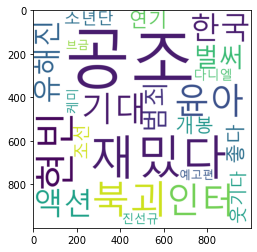

In [31]:
# 워드클라우드, 폰트설정
wc = WordCloud(font_path='c:\\Windows\\Fonts\\malgun.ttf', background_color="white", width=1000, height=1000, max_font_size=300)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('./image/공조2_리뷰.png')

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer()

# Document Term Matrix
dtm = vectorizer.fit_transform(more_than_time)

# Term Freqeuncy
tf = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())

C:\Users\hyha1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
tf

,가족,가족영화,가즈,간다,갈다,갈수록,감독,감동,감사하다,강동원,...,호감,화려하다,화전,확인,활용,황제성,회개,후기,휴지,흥행
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df = tf.astype(bool).sum(axis = 0)
df

가족      1
가족영화    1
가즈      3
간다      1
갈다      1
       ..
황제성     1
회개      1
후기      1
휴지      2
흥행      2
Length: 518, dtype: int64

In [36]:
# 문서 개수
D = len(tf)

# Inverse Document Frequency
idf = np.log((D+1) / (df+1)) + 1
idf

가족      7.083360
가족영화    7.083360
가즈      6.390213
간다      7.083360
갈다      7.083360
          ...   
황제성     7.083360
회개      7.083360
후기      7.083360
휴지      6.677895
흥행      6.677895
Length: 518, dtype: float64

In [37]:
# TF-IDF
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis = 1, keepdims = True)

In [38]:
tfidf

,가족,가족영화,가즈,간다,갈다,갈수록,감독,감동,감사하다,강동원,...,호감,화려하다,화전,확인,활용,황제성,회개,후기,휴지,흥행
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
